In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt    
from math import pi
import scipy.stats
  
df_1 = pd.read_csv("./resultados_esc1.jtl") 
df_2 = pd.read_csv("./resultados_esc2.jtl") 
df_3 = pd.read_csv("./resultados_esc3.jtl") 

stationaryPeriod = 200

startTime = 10*1000
endTime = stationaryPeriod*1000

firstTimestamp = df_1.iloc[0]['timeStamp']

df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed']) > (firstTimestamp + startTime)]
df_1 = df_1[(df_1['timeStamp'] + df_1['elapsed']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_2.iloc[0]['timeStamp']
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed']) > (firstTimestamp + startTime)]
df_2 = df_2[(df_2['timeStamp'] + df_2['elapsed']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_3.iloc[0]['timeStamp']
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed']) > (firstTimestamp + startTime)]
df_3 = df_3[(df_3['timeStamp'] + df_3['elapsed']) <= (firstTimestamp + startTime + endTime)]

elapsedData = df_1['elapsed']
df_1_case_1 = df_1[df_1['label'] == 'Caso prueba 1']['elapsed']
df_1_case_1.reset_index(drop=True, inplace=True)

df_1_case_2 = df_1[df_1['label'] == 'Caso prueba 2']['elapsed']
df_1_case_2.reset_index(drop=True, inplace=True)

df_2_case_1 = df_2[df_2['label'] == 'Caso prueba 1']['elapsed']
df_2_case_1.reset_index(drop=True, inplace=True)

df_2_case_2 = df_2[df_2['label'] == 'Caso prueba 2']['elapsed']
df_2_case_2.reset_index(drop=True, inplace=True)

df_3_case_1 = df_3[df_3['label'] == 'Caso prueba 1']['elapsed']
df_3_case_1.reset_index(drop=True, inplace=True)

df_3_case_2 = df_3[df_3['label'] == 'Caso prueba 2']['elapsed']
df_3_case_2.reset_index(drop=True, inplace=True)


In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

In [3]:
def getRow(data, hilos, size):
    minResponseTime = data.min()
    maxResponseTime = data.max()
    meanResponseTime = data.mean()
    medianResponseTime = data.median()
    modeResponseTime = data.mode()
    totalTime = data.sum()

    std = data.std(ddof=0)

    rango = data.max() - data.min()
    iqr = data.quantile(0.75) - data.quantile(0.25)

    numRequest = data.size
    throughput = (numRequest/stationaryPeriod)
    potencia = (throughput/meanResponseTime)
    confidence_interval = mean_confidence_interval(data)
    
    return [hilos, size, minResponseTime, maxResponseTime, meanResponseTime, medianResponseTime, std, numRequest, throughput, potencia, rango, iqr, confidence_interval];


In [4]:
data = [
    getRow(df_1_case_1, 200, 'small'), getRow(df_1_case_2, 200, 'big'),
    getRow(df_2_case_1, 200, 'small'), getRow(df_2_case_2, 200, 'big'),
    getRow(df_3_case_1, 200, 'small'), getRow(df_3_case_2, 200, 'big'),
];

columns = ['N. hilos', 'Tam. imagen', 'Min', 'Max', 'Media', 'Mediana', 'Desv. estandar', 'N. Peticiones', 'Throughput', 'Potencia', 'Rango', 'IQR', 'Mean Confidence Interval']
  
keys = ['1º Ejecución Img. pequeña', '1º Ejecución Img. grande', '2º Ejecución Img. pequeña', '2º Ejecución Img. grande', '3º Ejecución Img. pequeña', '3º Ejecución Img. grande']

df = pd.DataFrame(data, columns = columns, index = keys) 
  
df 

N. hilos Tam. imagen    Min     Max         Media  \
1º Ejecución Img. pequeña       200       small   6135   68239  14779.050985   
1º Ejecución Img. grande        200         big  13243  144237  32417.326371   
2º Ejecución Img. pequeña       200       small   5302   70574  14831.005862   
2º Ejecución Img. grande        200         big  10498  114358  32174.701164   
3º Ejecución Img. pequeña       200       small   6832   44112  14853.428246   
3º Ejecución Img. grande        200         big   8815   96952  32336.565104   

                           Mediana  Desv. estandar  N. Peticiones  Throughput  \
1º Ejecución Img. pequeña  14239.0     4247.715311            863       4.315   
1º Ejecución Img. grande   30707.5     9171.601356            766       3.830   
2º Ejecución Img. pequeña  14412.0     4649.870016            853       4.265   
2º Ejecución Img. grande   31088.0     8017.129813            773       3.865   
3º Ejecución Img. pequeña  14357.5     4025.818898            878       4.390   
3º Ejecución Img. grande   30963.0     8382.128783            768       3.840   

                           Potencia   Rango      IQR  \
1º Ejecución Img. pequeña  0.000292   62104  4284.00   
1º Ejecución Img. grande   0.000118  130994  7291.25   
2º Ejecución Img. pequeña  0.000288   65272  4322.00   
2º Ejecución Img. grande   0.000120  103860  7214.00   
3º Ejecución Img. pequeña  0.000296   37280  4361.75   
3º Ejecución Img. grande   0.000119   88137  8052.00   

                                           Mean Confidence Interval  
1º Ejecución Img. pequeña   (14495.089079375575, 15063.01289049696)  
1º Ejecución Img. grande    (31766.372522364545, 33068.28021914981)  
2º Ejecución Img. pequeña  (14518.335658874948, 15143.676064454477)  
2º Ejecución Img. grande     (31608.27960889825, 32741.12271969166)  
3º Ejecución Img. pequeña  (14586.618120923291, 15120.238371104044)  
3º Ejecución Img. grande    (31742.422631669167, 32930.70757666417)

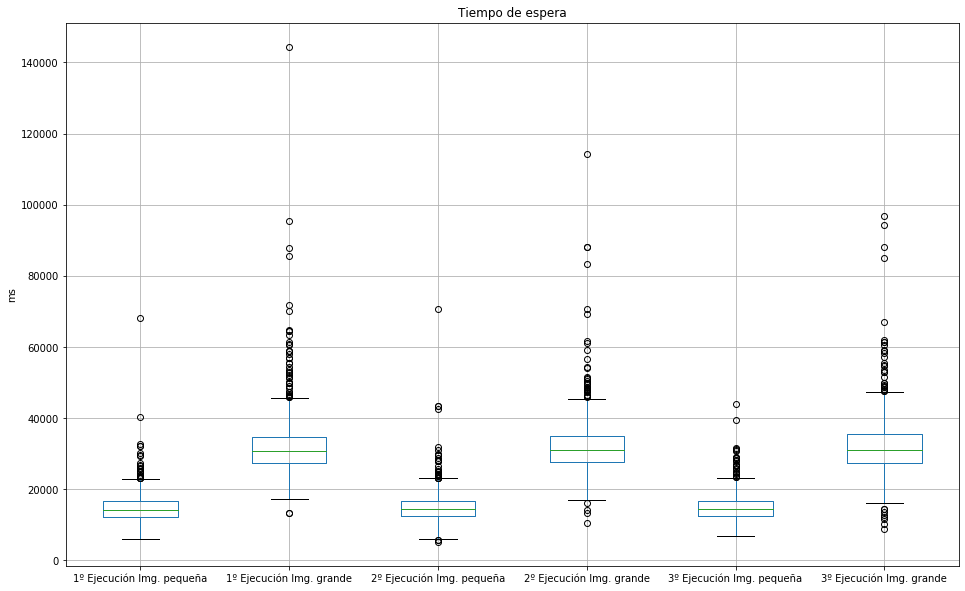

In [5]:
allDf = pd.concat(
    [df_1_case_1, df_1_case_2,
    df_2_case_1, df_2_case_2,
    df_3_case_1, df_3_case_2], axis = 1, keys=keys)
bplot = allDf.boxplot(column=keys, figsize=(16,10))
bplot.set_ylabel('ms')
bplot.set_title('Tiempo de espera')
plt.show()


Text(0, 0.5, 'ms')

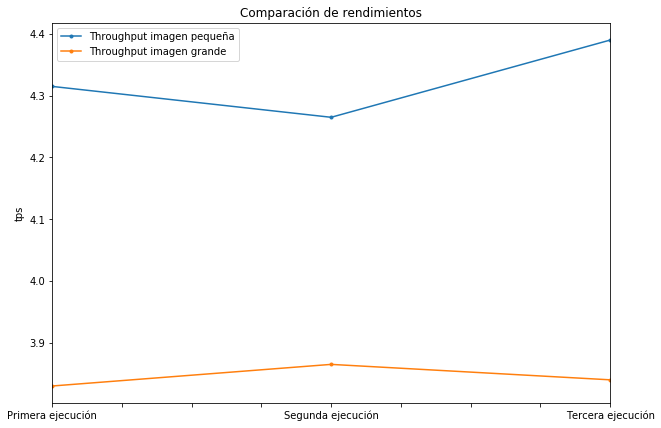

In [6]:
dfSmall = df[df['Tam. imagen'] == 'small'].reset_index()['Throughput'];
dfBig = df[df['Tam. imagen'] == 'big'].reset_index()['Throughput'];
dfLines = pd.concat([dfSmall, dfBig], axis=1)
dfLines.index = ['Primera ejecución', 'Segunda ejecución', 'Tercera ejecución']
dfLines.columns = ['Throughput imagen pequeña', 'Throughput imagen grande']
ax = dfLines.plot(title = 'Comparación de rendimientos', style = '.-', figsize=(10, 7))
ax.set_ylabel("tps")

columns = ['Media', 'Desv. estandar', 'IQR']
dfBar = df[columns]
ax = dfBar.plot(title = 'Tendencia central vs dispersión', kind = 'bar', figsize=(10, 7))
ax.set_ylabel("ms")
ax = dfBar.plot(title = 'Tendencia central vs dispersión', style = '.-', figsize=(14, 7))
ax.set_ylabel("ms")


In [7]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [8]:
# load the dataset 
df_perf_1 = pd.read_csv("./log_perfmon_1.csv") 
df_perf_2 = pd.read_csv("./log_perfmon_2.csv") 
df_perf_3 = pd.read_csv("./log_perfmon_3.csv") 

firstTimestamp = df_perf_1.iloc[0]['timeStamp']
df_perf_1 = df_perf_1[(df_perf_1['timeStamp']) > (firstTimestamp + startTime)]
df_perf_1 = df_perf_1[(df_perf_1['timeStamp']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_perf_2.iloc[0]['timeStamp']
df_perf_2 = df_perf_2[(df_perf_2['timeStamp']) > (firstTimestamp + startTime)]
df_perf_2 = df_perf_2[(df_perf_2['timeStamp']) <= (firstTimestamp + startTime + endTime)]

firstTimestamp = df_perf_3.iloc[0]['timeStamp']
df_perf_3 = df_perf_3[(df_perf_3['timeStamp']) > (firstTimestamp + startTime)]
df_perf_3 = df_perf_3[(df_perf_3['timeStamp']) <= (firstTimestamp + startTime + endTime)]


df_disk_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(100)
df_tcp_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed'].div(100)
df_mem_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_1 = df_perf_1[df_perf_1['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed'].div(100)

df_disk_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(100)
df_tcp_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed'].div(100)
df_mem_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_2 = df_perf_2[df_perf_2['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed'].div(100)

df_disk_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed'].div(100)
df_tcp_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed'].div(100)
df_mem_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed'].div(1000)
df_cpu_3 = df_perf_3[df_perf_3['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed'].div(100)


In [9]:
def getPerfmonRow(data, escenario, usuarios):
    disk = data[data['label'] == 'virtual.lab.inf.uva.es Disks I/O queue']['elapsed']
    tcp = data[data['label'] == 'virtual.lab.inf.uva.es TCP estab']['elapsed']
    memory = data[data['label'] == 'virtual.lab.inf.uva.es Memory usedperc']['elapsed']
    cpu = data[data['label'] == 'virtual.lab.inf.uva.es CPU user']['elapsed']
    
    meanDisk =disk.mean()
    meanTcp = tcp.mean() / 1000
    meanMemory = memory.mean() / 1000
    meanCpu = cpu.mean() / 100
    
    return [escenario, usuarios, meanCpu, meanMemory, meanTcp, meanDisk];

In [10]:
# initialize list of lists 
data = [
    getPerfmonRow(df_perf_1, 1, 50),
    getPerfmonRow(df_perf_2, 2, 100),
    getPerfmonRow(df_perf_3, 3, 250),
];

columns = ['Escenario', 'Usuarios', 'CPU', 'Memory', 'Tcp', 'Disk']
  
df = pd.DataFrame(data, columns = columns, index = ['Primera ejecución', 'Segunda ejecución', 'Tercera ejecución']) 
  
df

Escenario  Usuarios        CPU     Memory         Tcp  \
Primera ejecución          1        50  11.829600  32.745705  200.765000   
Segunda ejecución          2       100  11.230714  32.875898  200.438776   
Tercera ejecución          3       250  10.373350  32.744890  200.750000   

                        Disk  
Primera ejecución  35.920000  
Segunda ejecución   0.040816  
Tercera ejecución   7.500000

In [11]:
allDf = pd.concat([df_cpu_1, df_cpu_2, df_cpu_3], axis=1, keys=['Nivel de carga 1', 'Nivel de carga 2', 'Nivel de carga 3'])
bplot = allDf.boxplot(
    column=['Nivel de carga 1', 'Nivel de carga 2', 'Nivel de carga 3'],
    labels=['Nivel de carga 1', 'Nivel de carga 2', 'Nivel de carga 3'],
    vert=True,
    figsize=(12,14)
)
plt.title('CPU usage %')

plt.show()

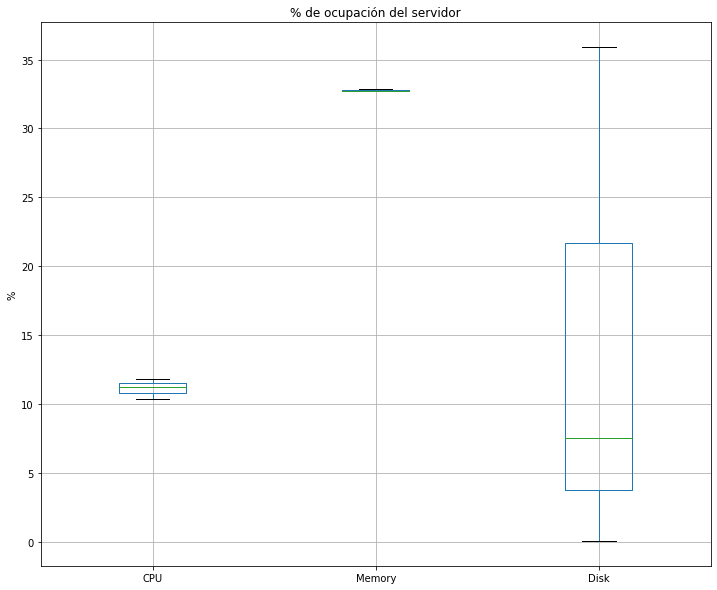

Text(0, 0.5, '%')

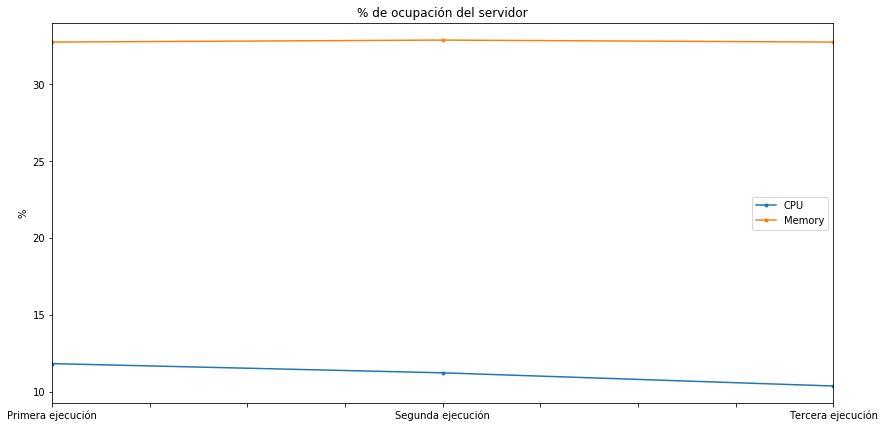

In [12]:
bplot = df.boxplot(
    column=['CPU', 'Memory', 'Disk'],
    labels=['CPU', 'Memory', 'Disk'],
    vert=True,
    figsize=(12,10)
)
bplot.set_ylabel('%')
plt.title('% de ocupación del servidor')
plt.show()

columns = ['CPU', 'Memory']
dfLines = df[columns]
ax = dfLines.plot(title = '% de ocupación del servidor', style = '.-', figsize=(14, 7))
ax.set_ylabel("%")